# min_dR signal

**Q:** Do the rev deta_hh plots look more "spread out" for min_dR??

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot
import matplotlib.pyplot as plt
from matplotlib import gridspec
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.preprocessing import StandardScaler

import os
os.sys.path+= ['../RRevolution/code/','../PAG-opt/','../code/']
from analysis import getXhh
# from utils import mcToYr

from eventDisplays import rainbow_text

from plots import draw_SR, draw_VR, draw_CR


import logging
for name in logging.Logger.manager.loggerDict.keys():
    logging.getLogger(name).setLevel(logging.CRITICAL)

# Let's do ATLAS style plots too!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
physicsSample = 'SMNR'
mc='mc16d'

In [6]:
f'../data/{physicsSample}_{mc}_PFlow-APR2020/'

'../data/SMNR_mc16d_PFlow-APR2020/'

In [7]:
sdf = pd.read_hdf(f'../data/{physicsSample}_{mc}_PFlow-APR2020/df_min_dR1_3b.h5')

In [8]:
sdf.head()

eventNumber  nresolvedJets  weight_pileup  mcEventWeight  rand_run_nr  \
entry                                                                          
1          1941934              6       1.157816       0.031172       338933   
3          1941621              9       1.069462       0.031172       330294   
7          1940021              5       0.997578      -0.031172       336915   
10         1941722              5       1.147439       0.031172       334443   
13         1941304              4       1.172122       0.031172       333469   

            j0_pt    j0_eta    j0_phi        j0_E  j0_Db  ...     w_k11  \
entry                                                     ...             
1      177.026642  0.716126 -3.064180  225.759949    5.0  ...  0.004094   
3      163.804291  0.543150  1.787875  188.962265    5.0  ...  0.008277   
7       96.130928  0.997893 -0.847785  148.642654    5.0  ... -0.003751   
10     209.830338  0.123715 -2.809244  211.892700    5.0  ...  0.002309   
13     114.343376  1.830857  2.239976  366.443390    5.0  ...  0.007325   

          w_k12     w_k13     w_k14     w_k15     w_k16     w_k17     w_k18  \
entry                                                                         
1      0.005212  0.006467  0.007860  0.009390  0.011058  0.012864  0.014808   
3      0.010433  0.012840  0.015497  0.018404  0.021561  0.024969  0.028628   
7     -0.004775 -0.005925 -0.007201 -0.008603 -0.010132 -0.011786 -0.013567   
10     0.002961  0.003699  0.004522  0.005431  0.006427  0.007508  0.008675   
13     0.009257  0.011417  0.013805  0.016421  0.019265  0.022337  0.025637   

          w_k19     w_k20  
entry                      
1      0.016889  0.019107  
3      0.032536  0.036695  
7     -0.015474 -0.017506  
10     0.009928  0.011266  
13     0.029164  0.032919  

[5 rows x 203 columns]

In [9]:
for c in sdf.columns:
    print(c)

eventNumber
nresolvedJets
weight_pileup
mcEventWeight
rand_run_nr
j0_pt
j0_eta
j0_phi
j0_E
j0_Db
j1_pt
j1_eta
j1_phi
j1_E
j1_Db
j2_pt
j2_eta
j2_phi
j2_E
j2_Db
j3_pt
j3_eta
j3_phi
j3_E
j3_Db
njets
X_wt
mc_sf
HT_all
lead_pt
lead_tag
ntag_all
HLT_2j15_gsc35_bmv2c1040_split_2j15_gsc35_boffperf_split_L14J15.0ETA25
HLT_2j35_gsc55_bmv2c1050_split_ht300_L1HT190-J15s5.ETA21
HLT_j110_gsc150_boffperf_split_2j35_gsc55_bmv2c1070_split_L1J85_3J30
HLT_j225_gsc300_bmv2c1070_split
trigger
run_number
h0_pt
h0_eta
h0_phi
h0_E
h0_barcode
h1_pt
h1_eta
h1_phi
h1_E
h1_barcode
b0_pt
b0_eta
b0_phi
b0_E
b0_parent_barcode
b1_pt
b1_eta
b1_phi
b1_E
b1_parent_barcode
b2_pt
b2_eta
b2_phi
b2_E
b2_parent_barcode
b3_pt
b3_eta
b3_phi
b3_E
b3_parent_barcode
truth_mhh
truth_pthh
b0_jidx
b0_drMatch
b1_jidx
b1_drMatch
b2_jidx
b2_drMatch
b3_jidx
b3_drMatch
j0_bidx
j1_bidx
j2_bidx
j3_bidx
j0_drMatch
j1_drMatch
j2_drMatch
j3_drMatch
correctPair
sameParent
unique
dRmatch
goodJets
ntag
GNNJets
pT_h1_pair0
eta_h1_pair0
phi_h1_pai

In [10]:
n = 40
r = (200,1200)

In [11]:
x0,y0 = 120, 110
x1,y1 = 124, 117

In [12]:
sdf['Xhh_new'] = getXhh(*sdf[['m_h1','m_h2']].values.T,x1, y1)

In [13]:
text = "$\mathbf{ATLAS}$ Simulation Internal\n"
text += f"{physicsSample[:2]} {mc}, APR20 MNT"
text += f"\n4b min_dR, "+"$X_{wt}$ > 1.5"

In [14]:
figDir = f'figures/{physicsSample}_{mc}/min_dR'

In [15]:
figDir

'figures/SMNR_mc16d/min_dR'

10.798292028198503
1.5483803912471736 1.1433912314284291
11.354958265504212
1.7127855057848476 1.1508403171316095


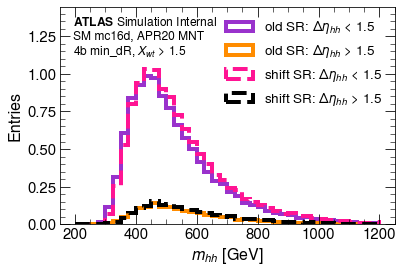

In [16]:
mi = (sdf.ntag>=4) & (sdf.kinematic_region ==0) & (sdf.X_wt > 1.5)
mj = (sdf.ntag>=4) & (sdf.Xhh_new < 1.6) & (sdf.X_wt > 1.5)

s0,_,_ = plt.hist(sdf.loc[mi & (sdf.abs_deta_hh < 1.5),'m_hh'],n,r,
         histtype='step',color='darkorchid',lw=4,
         label='old SR: $\Delta \eta_{hh}$ < 1.5',
         weights=sdf.loc[mi & (sdf.abs_deta_hh < 1.5),'mc_sf'])
print(np.sum(s0))
s1,_,_ =plt.hist(sdf.loc[mi & (sdf.abs_deta_hh > 1.5),'m_hh'],n,r,
         histtype='step',color='darkorange',lw=4,
         label='old SR: $\Delta \eta_{hh}$ > 1.5',
         weights=sdf.loc[mi & (sdf.abs_deta_hh > 1.5),'mc_sf'])
print(np.sum(s1), (np.sum(s0)+np.sum(s1))/np.sum(s0))

plt.xlabel('$m_{hh}$ [GeV]',fontsize=16)
plt.ylabel('Entries',fontsize=16)
plt.legend(fontsize=13.5)

ax = plt.gca()
plt.text(0.04,.96,text,ha='left',va='top',transform=ax.transAxes,fontsize=12)
_,ymax = plt.ylim()
plt.ylim(0,1.4*ymax)

plt.savefig(f'{figDir}/m_hh_SR_old.pdf',bbox_inches='tight')

s0,_,_ = plt.hist(sdf.loc[mj & (sdf.abs_deta_hh < 1.5),'m_hh'],n,r,
         histtype='step',color='deeppink',lw=4,ls='--',
         label='shift SR: $\Delta \eta_{hh}$ < 1.5',
         weights=sdf.loc[mj & (sdf.abs_deta_hh < 1.5),'mc_sf'])
print(np.sum(s0))
s1,_,_ =plt.hist(sdf.loc[mj & (sdf.abs_deta_hh > 1.5),'m_hh'],n,r,
         histtype='step',color='k',lw=4,ls='--',
         label='shift SR: $\Delta \eta_{hh}$ > 1.5',
         weights=sdf.loc[mj & (sdf.abs_deta_hh > 1.5),'mc_sf'])
print(np.sum(s1), (np.sum(s0)+np.sum(s1))/np.sum(s0))

plt.legend(fontsize=13.5)

plt.savefig(f'{figDir}/m_hh_SR_old_and_new.pdf',bbox_inches='tight')

10.798292028198503
1.5483803912471736 1.1433912314284291
11.354958265504212
1.7127855057848476 1.1508403171316095


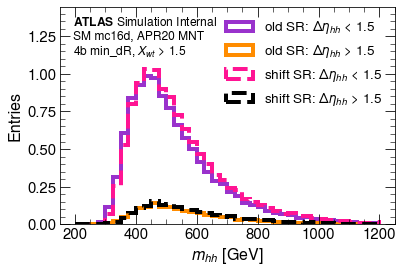

In [17]:
mi = (sdf.ntag>=4) & (sdf.kinematic_region ==0) & (sdf.X_wt > 1.5)
mj = (sdf.ntag>=4) & (sdf.Xhh_new < 1.6) & (sdf.X_wt > 1.5)

s0,_,_ = plt.hist(sdf.loc[mi & (sdf.abs_deta_hh < 1.5),'m_hh'],n,r,
         histtype='step',color='darkorchid',lw=4,
         label='old SR: $\Delta \eta_{hh}$ < 1.5',
         weights=sdf.loc[mi & (sdf.abs_deta_hh < 1.5),'mc_sf'])
print(np.sum(s0))
s1,_,_ =plt.hist(sdf.loc[mi & (sdf.abs_deta_hh > 1.5),'m_hh'],n,r,
         histtype='step',color='darkorange',lw=4,
         label='old SR: $\Delta \eta_{hh}$ > 1.5',
         weights=sdf.loc[mi & (sdf.abs_deta_hh > 1.5),'mc_sf'])
print(np.sum(s1), (np.sum(s0)+np.sum(s1))/np.sum(s0))

plt.xlabel('$m_{hh}$ [GeV]',fontsize=16)
plt.ylabel('Entries',fontsize=16)
plt.legend(fontsize=13.5)

ax = plt.gca()
plt.text(0.04,.96,text,ha='left',va='top',transform=ax.transAxes,fontsize=12)
_,ymax = plt.ylim()
plt.ylim(0,1.4*ymax)

plt.savefig(f'{figDir}/m_hh_SR_old.pdf',bbox_inches='tight')

s0,_,_ = plt.hist(sdf.loc[mj & (sdf.abs_deta_hh < 1.5),'m_hh'],n,r,
         histtype='step',color='deeppink',lw=4,ls='--',
         label='shift SR: $\Delta \eta_{hh}$ < 1.5',
         weights=sdf.loc[mj & (sdf.abs_deta_hh < 1.5),'mc_sf'])
print(np.sum(s0))
s1,_,_ =plt.hist(sdf.loc[mj & (sdf.abs_deta_hh > 1.5),'m_hh'],n,r,
         histtype='step',color='k',lw=4,ls='--',
         label='shift SR: $\Delta \eta_{hh}$ > 1.5',
         weights=sdf.loc[mj & (sdf.abs_deta_hh > 1.5),'mc_sf'])
print(np.sum(s1), (np.sum(s0)+np.sum(s1))/np.sum(s0))

plt.legend(fontsize=13.5)

plt.savefig(f'{figDir}/m_hh_SR_old_and_new.pdf',bbox_inches='tight')

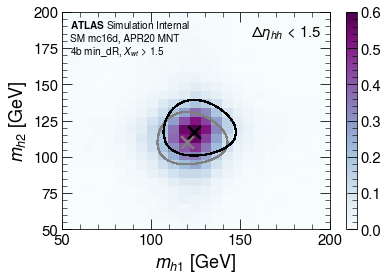

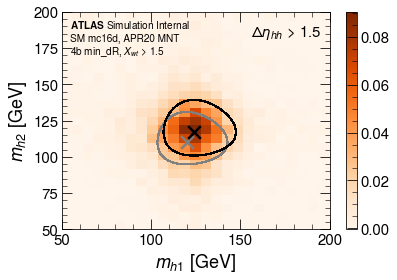

In [18]:
m = (sdf.ntag>=4) & (sdf.X_wt > 1.5)

for mk, cmap,l,t in zip([(sdf.abs_deta_hh < 1.5), (sdf.abs_deta_hh > 1.5)], ['BuPu','Oranges'],
                        ['$\Delta \eta_{hh}$ < 1.5','$\Delta \eta_{hh}$ > 1.5'],
                        ['deta','rev']):
    
    plt.figure()
    plt.hist2d(*sdf.loc[m & mk,['m_h1','m_h2']].values.T,25,[(50,200),(50,200)],
               cmap=cmap,weights=sdf.loc[m & mk,'mc_sf'])
    plt.colorbar()
    plt.xlabel('$m_{h1}$ [GeV]',fontsize=18)
    plt.ylabel('$m_{h2}$ [GeV]',fontsize=18)

    ax = plt.gca()
    plt.text(.97,.95,l,transform=ax.transAxes,ha='right',va='top',fontsize=15)
    plt.text(0.03,0.97,text,transform=ax.transAxes,ha='left',va='top',fontsize=10)

    # Overlay our region definitions
    for xi,yi,c,rTag in zip([x0,x1],[y0,y1],['grey','k'],['old','old_new']):

        plt.scatter([xi],[yi],160,marker='x',color=c)
        #for f in [draw_SR,draw_VR,draw_CR]:
        x,y = draw_SR(xi,yi)
        plt.plot(x,y,c,lw=1.2)

        plt.savefig(f'{figDir}/massplane_4b_{t}.pdf', bbox_inches='tight')

